In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport
import statsmodels.api as sms

In [2]:
df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,499.000000,484.000000,489.000000,484.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,316.537190,107.175869,3.119835,3.371743,3.481964,8.575511,0.561122,0.721503
std,144.193157,11.276345,6.113489,1.146648,0.990711,0.925257,0.605063,0.496748,0.141182
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,125.500000,308.000000,103.000000,2.000000,2.500000,3.000000,8.125000,0.000000,0.630000
50%,250.000000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,374.500000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,499.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

In [5]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Now there is no any null value in the dataset

In [8]:
df.drop(columns = ['Serial No.'], inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.00000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.00000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.53719,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.00000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.00000,103.0,2.0,2.0,3.0,8.21,0,0.65


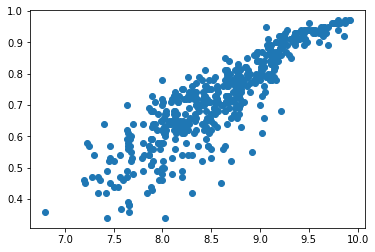

In [9]:
plt.scatter(x= 'CGPA', y  = 'Chance of Admit', data = df)

In [10]:
x  = df.drop(columns = ['Chance of Admit'])
y = df['Chance of Admit']


In [11]:
scaler = StandardScaler()
arr = scaler.fit_transform(x)
arr

array([[ 1.84447856,  1.79037614,  0.78020853, ...,  1.10137847,
         1.7776133 ,  0.88438841],
       [ 0.67268341, -0.02908981,  0.78020853, ...,  1.10137847,
         0.48719674,  0.88438841],
       [ 0.        , -0.52530779, -0.10622557, ...,  0.01951261,
        -0.95211405,  0.88438841],
       ...,
       [ 1.84447856,  1.62497014,  1.66664262, ...,  1.6423114 ,
         2.14157695,  0.88438841],
       [ 1.21351194,  2.12118813,  1.66664262, ...,  1.6423114 ,
         1.62871908,  0.88438841],
       [-0.40897364, -0.69071379,  0.78020853, ...,  1.6423114 ,
        -0.24073056, -1.13072491]])

In [21]:
df1 = pd.DataFrame(arr)
pf2  = ProfileReport(df1)
pf2

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [26]:
vif['vif'] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
vif

,vif
0,4.153268
1,3.792866
2,2.508768
3,2.775750
4,2.037308
5,4.651670
6,1.459311


In [27]:
vif['feature'] = x.columns
vif

,vif,feature
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


In [28]:
# splitting the dataset
x_train, x_test, y_train, y_test  = train_test_split(arr, y, test_size = 0.2, random_state = 3)

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
lr.score(x_test, y_test)

0.7894890889316952

In [31]:
pickle.dump(lr, open('admission_practice_lr.pickle', 'wb'))

In [32]:
lr.predict([[337.00000 , 118, 4.0, 4.5, 4.5, 9.65, 1]])

array([10.55291005])

In [33]:
test1 = scaler.transform([[337.00000 , 118, 4.0, 4.5, 4.5, 9.65, 1]])
test1

array([[1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

In [34]:
lr.predict(test1)

array([0.9544138])

In [35]:
model1 = pickle.load(open('admission_practice_lr.pickle', 'rb'))
model1.predict(test1)

array([0.9544138])

In [36]:
model1.score(x_test, y_test)

0.7894890889316952

In [37]:
from sklearn.linear_model import Lasso, LassoCV

In [39]:
lassocv = LassoCV(cv = 10 , max_iter = 2000000, normalize = True)
lassocv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=2000000, normalize=True)

In [40]:
lassocv.alpha_

1.6571480123928212e-05

In [41]:
from sklearn.linear_model import Ridge, RidgeCV
ridgecv =  RidgeCV(alphas = np.random.uniform(0,10,50), cv = 10, normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.28789919424648813